In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/MyDrive/observe_star_pattern

/gdrive/MyDrive/observe_star_pattern


In [ ]:
ls

star_classification.csv


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [ ]:
df_train=pd.read_csv('star_classification.csv')
df_train.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1237664721814903296.000000,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.000000,3.511610,186.130520,5783882297552056320.000000,0.576661,5137.009660,55588.647500,449.312740
std,8438559894562.569336,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.000000,1.586912,149.011073,3324016169583858176.000000,0.730707,2952.303351,1808.484233,272.498404
min,1237645942904389888.000000,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.000000,1.000000,11.000000,299519089380976640.000000,-0.009971,266.000000,51608.000000,1.000000
25%,1237659161195119360.000000,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.000000,2.000000,82.000000,2844137590766986752.000000,0.054517,2526.000000,54234.000000,221.000000
50%,1237663463144292864.000000,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.000000,4.000000,146.000000,5614883135353542656.000000,0.424173,4987.000000,55868.500000,433.000000
75%,1237668350286447104.000000,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.000000,5.000000,241.000000,8332144107427485696.000000,0.704154,7400.250000,56777.000000,645.000000
max,1237680531356386304.000000,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.000000,6.000000,989.000000,14126940609093851136.000000,7.011245,12547.000000,58932.000000,1000.000000


# EDA

In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_train.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [ ]:
binary_cols

[]

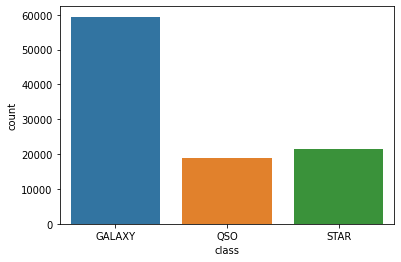

In [ ]:
sns.countplot("class", data=df_train)

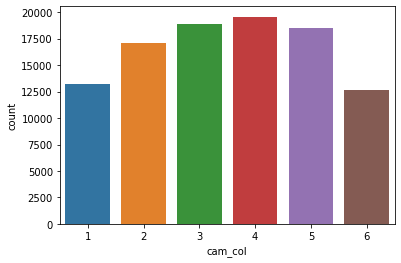

In [ ]:
sns.countplot("cam_col", data=df_train)

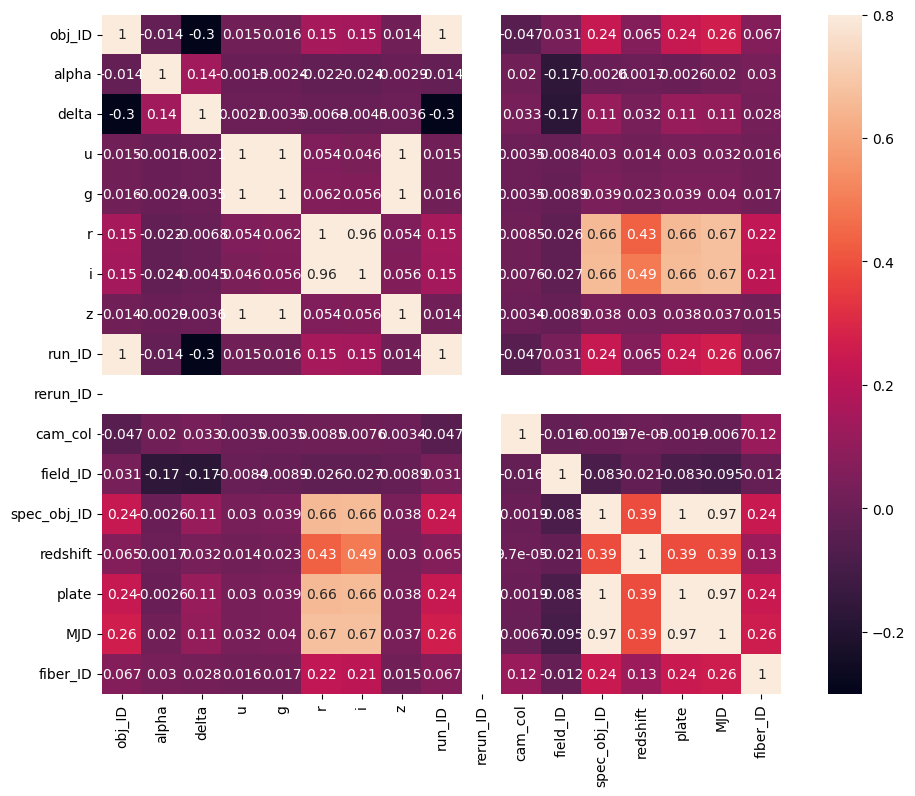

In [ ]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

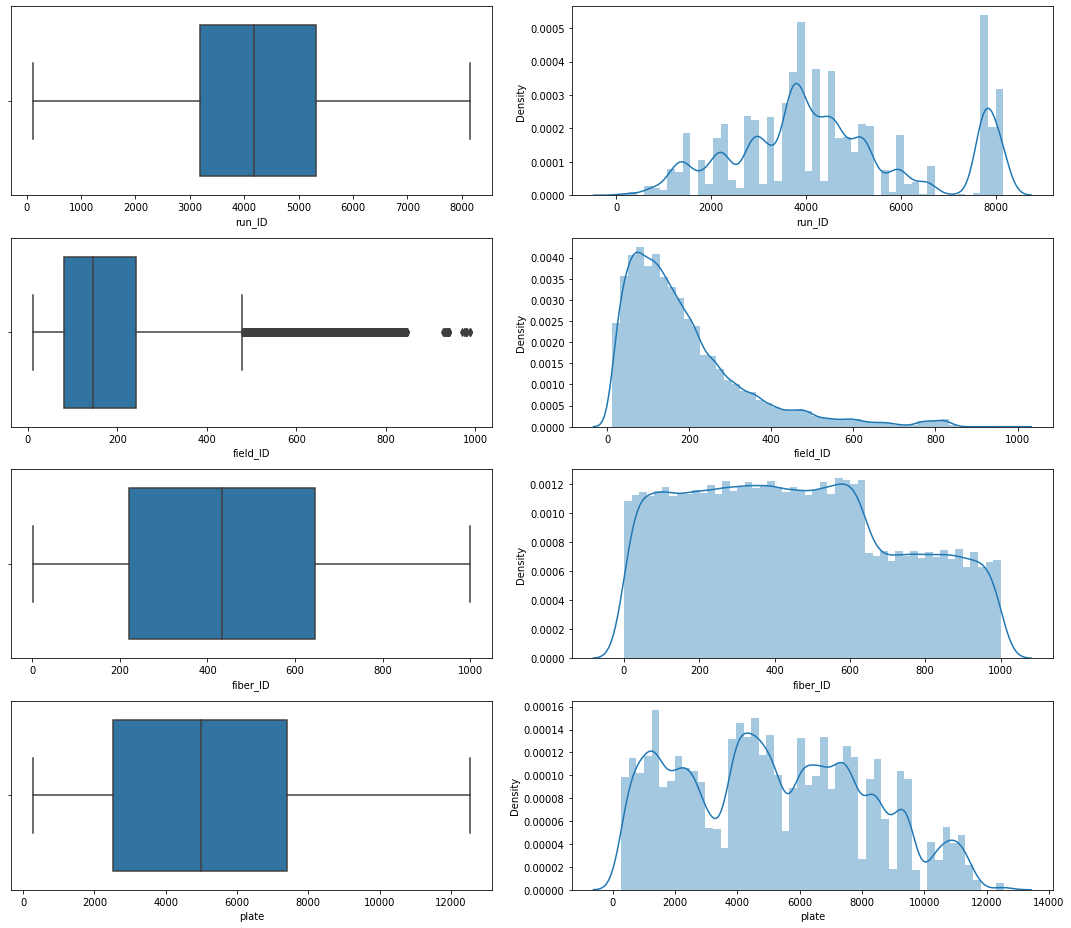

In [39]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["run_ID"], ax = ax[0,0])
sns.distplot(df_train['run_ID'], ax = ax[0,1])
sns.boxplot(x= df_train["field_ID"], ax = ax[1,0])
sns.distplot(df_train['field_ID'], ax = ax[1,1])
sns.boxplot(x= df_train["fiber_ID"], ax = ax[2,0])
sns.distplot(df_train['fiber_ID'], ax = ax[2,1])
sns.boxplot(x= df_train["plate"], ax = ax[3,0])
sns.distplot(df_train['plate'], ax = ax[3,1])
plt.tight_layout()

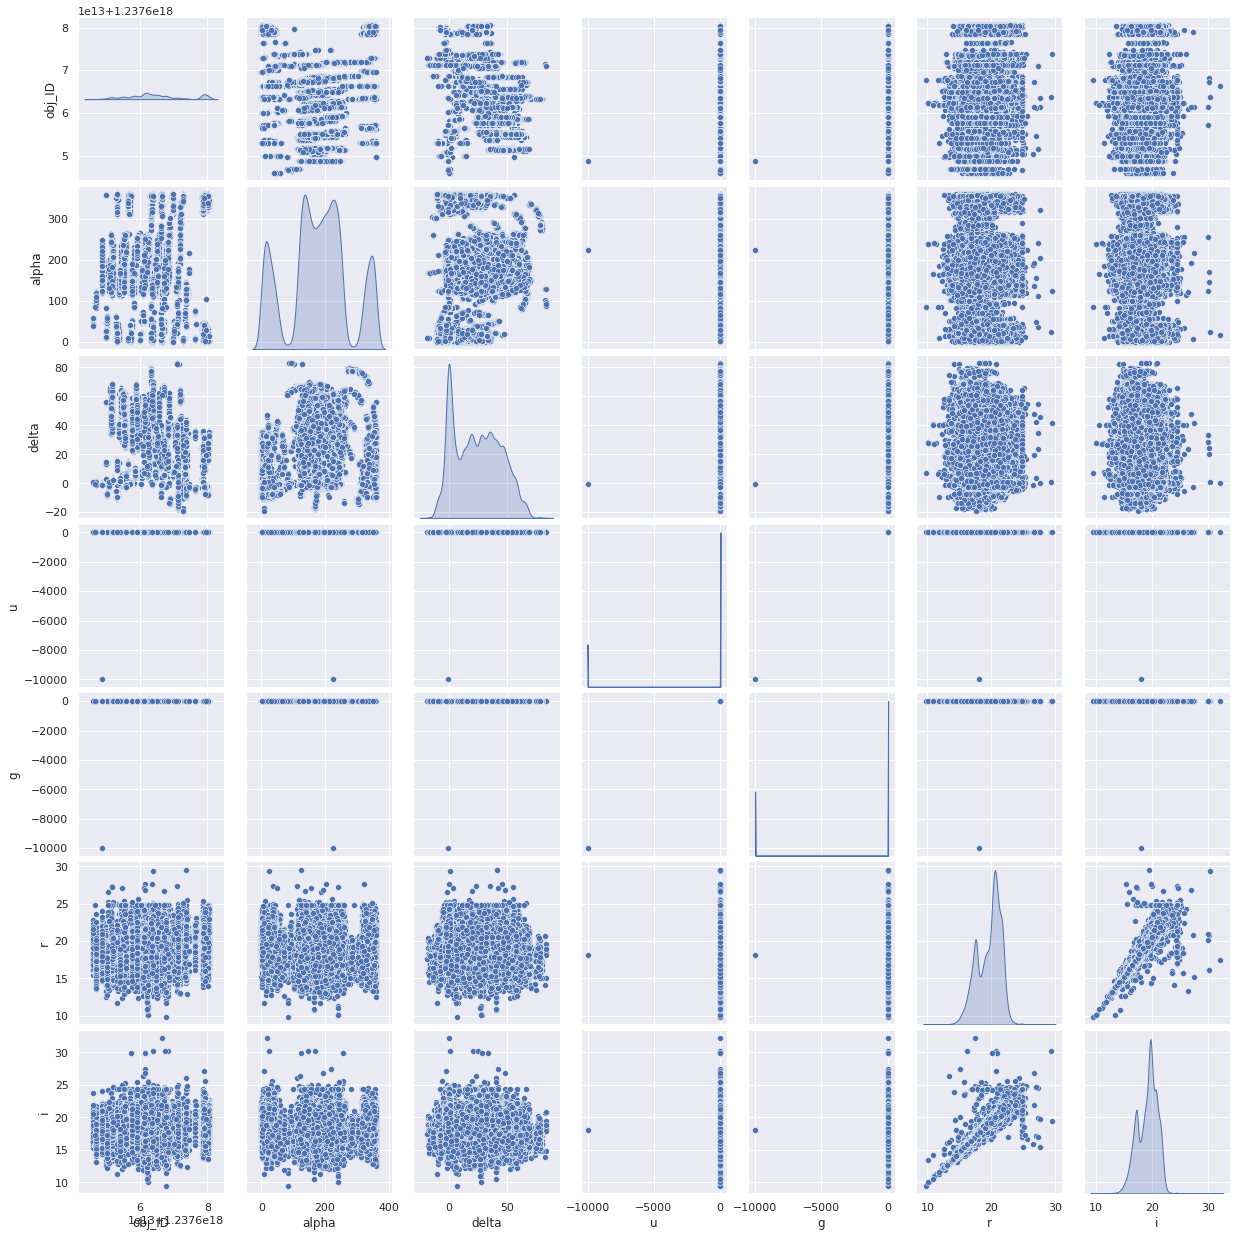

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [ ]:
X = df_train.drop(['class'], axis = 1)
Y = df_train["class"]
x_Data = X.values
y_Data = Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [42]:
model.score(X_test,y_test)

0.6031

In [43]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.6028125 0.6018125 0.6051875 0.6025625 0.599375 ]


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [45]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.6033

In [46]:
confusion_matrix(y_train, pred)

array([[46448,  1137,     0],
       [13348,  1816,     0],
       [16651,   600,     0]])

In [47]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [48]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [49]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

      GALAXY       0.61      0.98      0.75     11860
         QSO       0.52      0.12      0.19      3797
        STAR       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.37      0.37      0.31     20000
weighted avg       0.46      0.60      0.48     20000



In [50]:
cma = confusion_matrix(y_test, predicted_test)

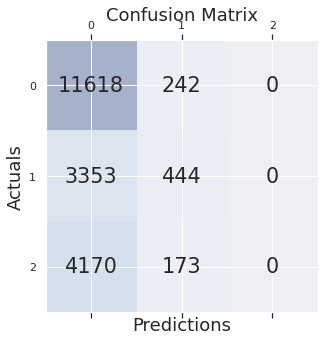

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier as rf

In [53]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [54]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.98135

In [55]:
confusion_matrix(y_train, pred)

array([[47063,   348,   174],
       [  967, 14195,     2],
       [    1,     0, 17250]])

In [56]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [57]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [58]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     11860
         QSO       0.97      0.92      0.94      3797
        STAR       0.98      1.00      0.99      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [59]:
cma = confusion_matrix(y_test, pred_test)

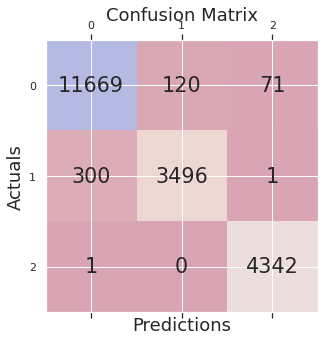

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [61]:
from sklearn import tree

In [62]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [63]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [64]:
confusion_matrix(y_train, pred1)

array([[47585,     0,     0],
       [    0, 15164,     0],
       [    0,     0, 17251]])

In [65]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [66]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11860
         QSO       0.91      0.92      0.91      3797
        STAR       1.00      0.99      0.99      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



In [67]:
cma = confusion_matrix(y_test, pred1_test)

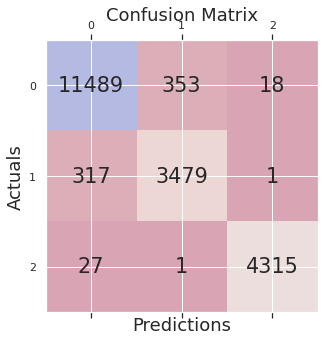

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [70]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.6029

In [71]:
confusion_matrix(y_train, pred_LR)

array([[46410,  1175,     0],
       [13342,  1822,     0],
       [16649,   602,     0]])

In [72]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [73]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

      GALAXY       0.61      0.98      0.75     11860
         QSO       0.51      0.12      0.19      3797
        STAR       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.37      0.37      0.31     20000
weighted avg       0.46      0.60      0.48     20000



In [74]:
cma = confusion_matrix(y_test, pred_LR_test)

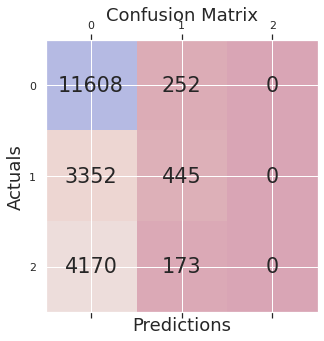

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [78]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.2496625

In [79]:
confusion_matrix(y_train, pred_NN)

array([[    0, 32970, 14615],
       [    0, 13596,  1568],
       [    0, 10874,  6377]])

In [80]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [81]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

      GALAXY       0.00      0.00      0.00     11860
         QSO       0.24      0.90      0.37      3797
        STAR       0.28      0.36      0.32      4343

    accuracy                           0.25     20000
   macro avg       0.17      0.42      0.23     20000
weighted avg       0.11      0.25      0.14     20000



In [82]:
cma = confusion_matrix(y_test, pred_NN_test)

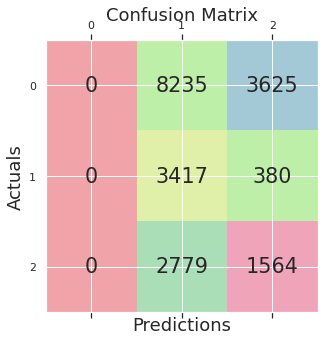

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [84]:
import xgboost as xgb

In [85]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [86]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.977275

In [87]:
confusion_matrix(y_train, pred_XGB)

array([[47015,   499,    71],
       [ 1245, 13917,     2],
       [    1,     0, 17250]])

In [88]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [89]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     11860
         QSO       0.97      0.91      0.94      3797
        STAR       1.00      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [90]:
cma = confusion_matrix(y_test, pred_XGB_test)

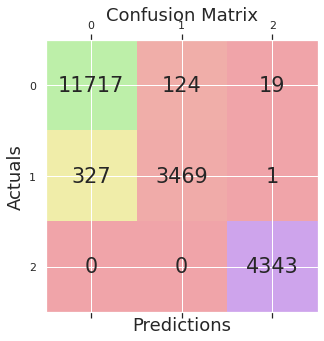

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

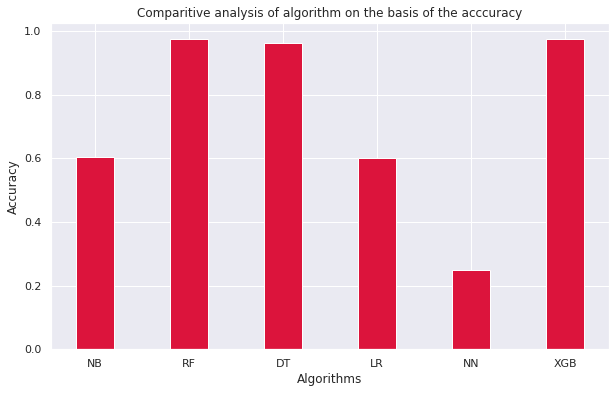

In [92]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


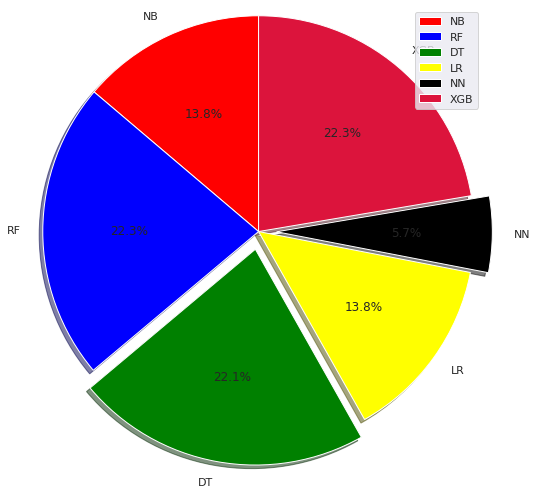

In [94]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [95]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']